In [1]:
import pandas
import matplotlib.pyplot as plt
plt.show(range(10))
print(range(10))

range(0, 10)


In [2]:
path = 'C:/Users/Zhou/Desktop/usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json
path = 'C:/Users/Zhou/Desktop/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [5]:
records[0]['al']

'en-US,en;q=0.8'

In [6]:
records[1]

{'a': 'GoogleMaps/RochesterNY',
 'c': 'US',
 'cy': 'Provo',
 'g': 'mwszkS',
 'gr': 'UT',
 'h': 'mwszkS',
 'hc': 1308262393,
 'hh': 'j.mp',
 'l': 'bitly',
 'll': [40.218102, -111.613297],
 'nk': 0,
 'r': 'http://www.AwareMap.com/',
 't': 1331923249,
 'tz': 'America/Denver',
 'u': 'http://www.monroecounty.gov/etc/911/rss.php'}

In [7]:
records[1]['u']

'http://www.monroecounty.gov/etc/911/rss.php'

In [8]:
# 用Python代码对时区进行计数
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]
#两种方法进行时区计数
#方法1：使用标准Python库；方法2：使用pandas

# 在遍历时区的过程中，将计数值保存在字典中
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # 所有的值均会被初始化为0
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts(time_zones)

In [9]:
counts['America/New_York']

1251

In [10]:
len(time_zones)

3440

In [11]:
# 前10位的时区及计数值
def top_counts(count_dict,n=10):
    value_key_pairs = [(count,tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [12]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [13]:
# 使用Collections.counter 类

from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [14]:
# 用pandas 对时区进行计数
#DataFrame 是pandas中最重要的数据结构，用于将数据表示为一个表格。
from pandas import DataFrame,Series
import pandas as pd; import numpy as np
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [15]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [16]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [17]:
# fillna 函数，可以替换缺失值（NA）
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

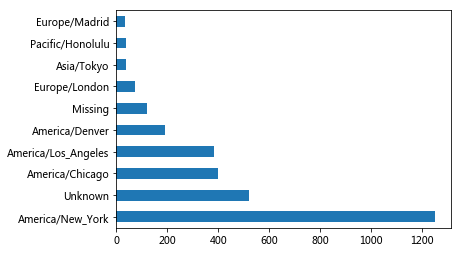

In [18]:
%matplotlib inline 
tz_counts[:10].plot(kind='barh',rot=0)

In [19]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [20]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [21]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [22]:
frame['a'][1000]

'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US; rv:1.9.2.17) Gecko/20110420 Firefox/3.6.17'

In [23]:
results = Series([ x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [24]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [25]:
#将缺失的数据移除
cframe = frame[frame.a.notnull()]
# 根据a值计算出各行是否为windows
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='<U11')

In [26]:
# 根据得到的时区和操作系统对数据进行分组
by_tz_os = cframe.groupby(['tz',operating_system])

In [27]:
# 通过size对分组结果进行计数
agg_counts = by_tz_os.size().unstack().fillna(0)

In [28]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [29]:
# 用于按升序排列

indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [30]:
# 通过take按照顺序 截取10行
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


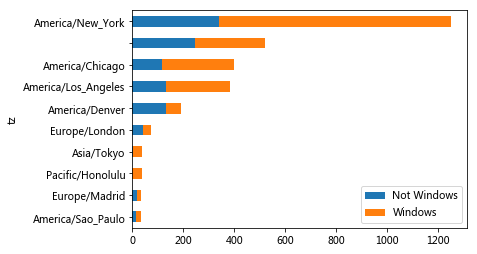

In [31]:
count_subset.plot(kind='barh',stacked = True)

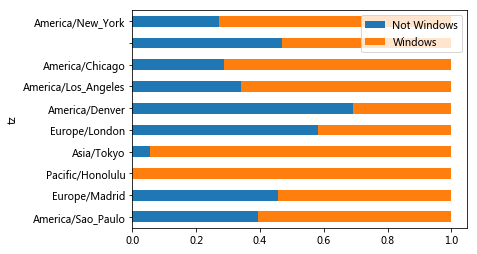

In [32]:
#将各行规范化为“总计为1”重新绘图
normed_subset = count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind='barh',stacked = True)

In [33]:

# 通过pandas.read_table将各个表分别读到一个pandas DataFrame中

import pandas as pd
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('C:/Users/Zhou/Desktop/users.dat',sep='::',header=None,names=unames)

rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('C:/Users/Zhou/Desktop/ratings.dat',sep='::',header=None,names=rnames)


mnames = ['movie_id','title','genres']
movies = pd.read_table('C:/Users/Zhou/Desktop/movies.dat',sep='::',header=None,names=mnames)


G:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
G:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
G:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]


In [34]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [35]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [36]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [37]:
# 根据性别和年龄计算某部电影的平均得分，可以将所有数据合并到一个表中
# 利用merge()函数,先将ratings跟users合并到一起，然后再将movies也合并进去。
#pandas会根据列名的重叠情况推断出哪些列是合并键。
data = pd.merge(pd.merge(ratings,users),movies)

In [38]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [39]:
data.ix[0]

G:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [40]:
# 利用pivot_table方法进行聚合操作
# 可以得到电影平均得分，行标为电影名称，列标为性别
mean_ratings = data.pivot_table(values='rating',index='title',columns='gender',aggfunc='mean')

In [41]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [42]:
# 过滤掉评分数据不够250条的电影
# 先对title进行分组，然后利用size()得到一个含有各电影分组大小的Series对象：
ratings_by_title = data.groupby('title').size()

In [43]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [44]:
active_titles = ratings_by_title.index[ratings_by_title>=250]

In [45]:
active_titles
len(active_titles)

1216

In [46]:
mean_ratings = mean_ratings.ix[active_titles]

G:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [47]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [48]:
# 为了了解女性观众最喜欢的电影，可以对F列降序排列
top_feamle_ratings = mean_ratings.sort_index(axis=0, level=None, ascending=False, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by='F')

G:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


In [49]:
top_feamle_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [50]:
# 计算评分分歧，可以给mean_ratings加上一个用于存放平均得分之差的列，并对其进行排序
mean_ratings['diff'] = mean_ratings['M']-mean_ratings['F']

In [51]:
sorted_by_diff = mean_ratings.sort_index(by='diff')

G:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [52]:
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [53]:
# 对排序结果反序并取出前15行，得到的则是男性观众更喜欢的电影。
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [54]:
# 不考虑性别因素，找出分歧最大的电影，可以通过计算得分数据的方差或标准差。

# 根据电影名称分组的得分数据的标准差

rating_std_by_title = data.groupby('title')['rating'].std()

In [55]:
rating_std_by_title = rating_std_by_title.ix[active_titles]

G:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [56]:
# 根据值对Series进行降序排列
rating_std_by_title.rank(ascending = False)[:10]

title
'burbs, The (1989)                      122.0
10 Things I Hate About You (1999)       494.0
101 Dalmatians (1961)                   524.0
101 Dalmatians (1996)                   139.0
12 Angry Men (1957)                    1137.0
13th Warrior, The (1999)                 75.0
2 Days in the Valley (1996)             803.0
20,000 Leagues Under the Sea (1954)     993.0
2001: A Space Odyssey (1968)            288.0
2010 (1984)                             695.0
Name: rating, dtype: float64

#### 1880-2010年间全美婴儿姓名

- 由于该数据是一个以逗号隔开的格式，所以可以用pandas.read_csv将其加载到DataFrame中

In [57]:
import pandas as pd
names1880 = pd.read_csv('C:Desktop/yob1880.txt',names=['name','sex','births'])

FileNotFoundError: File b'C:Desktop/yob1880.txt' does not exist

In [ ]:
names1880

In [ ]:
# 用births列的sex分组小计表示该年度的births总计
names1880.groupby('sex').births.sum()

In [ ]:
# 将所有数据组装到一个DataFrame里面，并加上一个year字段，使用pandas.concat即可

# 2010是目前最后一个有效统计年度
years = range(1880,2011)
pieces = []
columns = ['name','sex','births']

for year in years:
    path = 'E:/DemoPython/pydata-book-1st-edition/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    
    frame['year'] = year
    pieces.append(frame)

# 将所有数据整合到单个DataFrame中
names = pd.concat(pieces,ignore_index=True)

In [ ]:
# 这里，concat默认是按行将多个DataFrame组合到一起的，
# 必须指定ignore_index=True，避免保留read_csv返回的原始行号
names

In [ ]:
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [ ]:
%matplotlib inline 
total_births.plot(title='Total births by sex and year')

In [ ]:
total_births.tail()

In [ ]:
# 插入一个prop列，用于存放指定名字的婴儿数相对于总出生数的比列
def add_prop(group):
    # 整数除法会向下圆整
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

In [ ]:
names

In [ ]:
# 有效性检查：验证所有分组的prop的总和是否为1
# 由于这是一个浮点型数据，所以应该用np.allclose来检查
import numpy as np
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

In [ ]:
# 取出该数据的子集，每对sex/year组合的前1000个名字
def get_top1000(group):
    return group.sort_index(by='births',ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

In [ ]:
top1000

In [ ]:
pieces = []
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_index(by='births',ascending=False)[:1000])
top1000 = pd.concat(pieces,ignore_index=True)

In [ ]:
top1000

In [ ]:
# 将前1000个名字分为男女两个部分
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [ ]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

In [ ]:
total_births

In [ ]:
subset = total_births[['John','Harry','Mary','Marilyn']]

In [ ]:
subset.plot(subplots=True,figsize=(12,10),grid=True,title="Number of births per year")

#### 评估命名多样性的增长
> 上图反映的降低情况可能意味着父母愿意给小孩起常见的名字越来越少。
可以通过计算最流行的1000个名字的比例，进行聚合并绘图。

In [ ]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)

In [ ]:
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1889,2020,10))

In [ ]:
# 计算占总出生人数前50%的不同名字的数量

df = boys[boys.year == 2010]
df

In [ ]:
# 先计算prop的累计和cumsum，然后再通过searchsorted方法找出0.5应该被插入在哪个位置

prop_cumsum = df.sort_index(by = 'prop',ascending=False).prop.cumsum()

In [ ]:
prop_cumsum[:10]

In [ ]:
prop_cumsum.searchsorted(0.5)

In [ ]:
# 用1900年的名字做个对比
df = boys[boys.year == 1900]
in1900 = df.sort_index(by = 'prop',ascending=False).prop.cumsum()
in1900.searchsorted(0.5)+1

In [ ]:
def get_quantile_count(group,q=0.5):
    group = group.sort_index(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(q)[0] + 1

# 注意！！这里和书本不一样，上面看到python3的searchsorted()返回的是ndarry类型
# 需要先取[0]元素，才能获得想要的数据，如果不做该处理，绘图会报错

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
# 依靠sex入栈操作，变Series为DataFrame

In [ ]:
# diversity.head()
diversity

In [ ]:
diversity.plot(title="Number of popular names in top 50%")

##### 碰到的问题
```
prop_cumsum.searchsorted(0.5)
Out: array([116], dtype=int64)

prop_cumsum.searchsorted(0.5)[0]
Out: 116

type(prop_cumsum.searchsorted(0.5))
Out: numpy.ndarray

type(prop_cumsum.searchsorted(0.5)[0])
Out: numpy.int64

```
###### 原因
- 未取[0]的结果，因为不是数字类型
```
sex
F    object
M    object
dtype: object
```
- 取[0]后均变为int64
```
sex
F    int64
M    int64
dtype: object
```

In [ ]:
diversity.dtypes

---------------------------
** 最后一个字母的变革 **

In [ ]:
# 将全部出生数据在年度，性别以及末字母进行聚合
# 从name列取出最后一个字母
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)

In [ ]:
# 选出具有一定代表性的三年，并输出前面几行
subtable = table.reindex(columns=[1910,1960,2010],level='year')

In [ ]:
subtable.head

In [ ]:
# 按从出生数对该表进行规范化处理
subtable.sum()

In [ ]:
letter_prop = subtable / subtable.sum().astype(float)

In [ ]:
# 生成一张各年度各性别的条形图
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,1,figsize=(10,11))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female')

In [ ]:
letter_prop = table / table.sum().astype(float)

In [ ]:
dny_ts = letter_prop.ix[['d','n','y'],'M']

In [ ]:
dny_ts.head()

In [ ]:
dny_ts = letter_prop.ix[['d','n','y'],'M'].T

In [ ]:
dny_ts[:5]

In [ ]:
dny_ts.plot(title="各年出生的男孩中名字以/d/n/y结尾的人数比列")

----
**变成女孩名字的男孩名字**

In [ ]:
# 找出其中以'lesl'开头的一组名字
all_names = top1000.name.unique()

In [ ]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [ ]:
lesley_like = all_names[mask]

In [ ]:
lesley_like

In [ ]:
# 然后过滤其他的名字，并按名字分组计算出生数以查看相对频率
filtered = top1000[top1000.name.isin(lesley_like)]

In [ ]:
filtered.groupby('name').births.sum()

In [ ]:
# 按照性别和年度进行聚合，并按年度进行规范化处理
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [ ]:
table = table.div(table.sum(1),axis=0)

In [ ]:
table.tail()

In [ ]:
table.plot(style={'M':'k','F':'k--'})